# DataJoint Homework: Part 4

## TASK: Organizing/saving your tables in python files. 

### Write a schema with manual tables that may be relevant for your research into a python file, and import it into a new notebook session, and start inserting some dummy data. 

#### Featuring dummy mouse behavioral data

#### Josie McGowan, April 2020

In [1]:
import datajoint as dj

In [2]:
dj.__version__

'0.12.5'

## Connecting to the database

In [3]:
# datajoint configuration
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'
# we will go into this attribute later
dj.config['fetch_format'] = 'frame' # This ensures that the fetch command by default creates a pd DataFrame 
    # other option is "array"

In [4]:
# connect to the database
# testing your connection
connection = dj.conn()
connection

Connecting root@127.0.0.1:3306


DataJoint connection (connected) root@127.0.0.1:3306

### Saving DataJoint configuration across session

In [5]:
dj.config.save_local() # Not sure if I needed to do this again 

In [6]:
dj.config.save_global()

## Data Overview

In the **mouse_database.py** file, the schema is called `mousedata` and we have a total of 4 tables: `MouseData`, `Behavior`, `MouseID`, `Drug`.

The `MouseData` table depends on both the `MouseID` and `Behavior` tables. This means that the primary keys of the `MouseID` and `Behavior` tables are inherited by `MouseData`. However, they are inherited in two different ways. In the case of the `MouseID` table, the primary keys of `MouseID` become part of the primary keys of `MouseData`. In the case of the `Behavior` table, the primary keys of `Behavior` are dependent attributes in the `MouseData` table. Since `MouseData` inherits `MouseID` and `Behavior`, it is necessary to have this class below the other two in the python file.

Let's import this file in order to initialize the schema and tables and use them in this iPython kernel. 

##### See: 'hw5_part2_MouseData.ipynb' and 'mouse_database.py'

In [15]:
import mouse_database as db

In [16]:
db

<module 'mouse_database' from '/Users/Josie/Desktop/Jupyter/PythonDataCourse/Homeworks/HW5/mouse_database.py'>

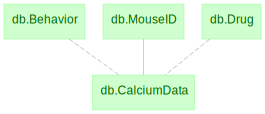

In [17]:
# you can take a look at the schema and all connections with datajoint.ERD
dj.ERD(db.schema)

In [18]:
# this is the definition for RecordingSession
print(db.CalciumData.definition)


    # full mouse data
    -> MouseID
    recording_id : int
    ---
    -> Drug
    experimenter : varchar(100)
    comments = null : varchar(4000)
    ---
    -> Behavior
    behavior_room : varchar(20)
    


### 1) Insert entries manually into `MouseID` ,  `Behavior`, and `Drug`  tables

In [ ]:
# Inserting entries for MouseID:
db.MouseID.insert([
    {'mouse_id': 1, 'age':8.0, 'sex': 'M', 'comments': None}, 
    {'mouse_id': 2, 'age':7.5, 'sex': 'F', 'comments':'anxious mouse'}, 
    {'mouse_id': 3, 'age':9.5, 'sex': 'F', 'comments': None}, 
    {'mouse_id': 4, 'age':10.0, 'sex':'M', 'comments': None},
    {'mouse_id': 5, 'age':12.5, 'sex':'F', 'comments': None}
])

In [ ]:
# Inserting entries for Behavior: 
db.Behavior.insert([
    {'behavior_name': 'CFC', 'behavior_type':'fear',  'duration':5}, 
    {'behavior_name': 'HomeCage', 'behavior_type':'baseline',  'duration':5}, 
    {'behavior_name': 'EPM', 'behavior_type':'anxiety', 'duration':5}, 
    {'behavior_name': 'TST', 'behavior_type':'depressive-like', 'duration':5},
    {'behavior_name': 'Rotarod', 'behavior_type':'motor', 'duration':5}
])

In [21]:
# Inserting entries for Drug: 
db.Drug.insert([
    {'drug': 'saline', 'dose':0,  'route':'i.p.', 'comments': None}, 
    {'drug': 'ketamine', 'dose':30,  'route':'i.p.', 'comments':None}, 
    {'drug': 'HNK', 'dose':0.75,  'route':'i.p.', 'comments':None} 
])

Let's take a closer look at the `RecordingSession` table. Each table instance has an attribute called `heading`. The `heading` attribute itself is a class that exists in datajoint, and has some functionality that we will briefly touch upon here.

In [22]:
rec = db.CalciumData()
rec.heading

# full mouse data
mouse_id             : int                          # id for mouse subject
recording_id         : int                          # 
---
drug                 : varchar(10)                  # full name of drug administered
experimenter         : varchar(100)                 # 
comments=null        : varchar(4000)                # 
behavior_name        : varchar(31)                  # short name for stimulus
behavior_room        : varchar(20)                  # 

You can see that the heading is similar to the definition, except that the dependencies have been swapped with the actual primary keys of the "parent" tables.

The heading tells you the names of the actual columns after processing the `definition` attribute.

In [23]:
# this shows all primary keys for your table
print(rec.heading.primary_key, '\n')
# this shows all the dependent/secondary attributes
print(rec.heading.secondary_attributes, '\n')
# this shows all attributes
print(rec.heading.names, '\n')
# this shows some extra metadata info of your table
# you don't need to understand its key here. It's just so that you know this information exists
print(rec.heading.table_info)

['mouse_id', 'recording_id'] 

['drug', 'experimenter', 'comments', 'behavior_name', 'behavior_room'] 

['mouse_id', 'recording_id', 'drug', 'experimenter', 'comments', 'behavior_name', 'behavior_room'] 

{'name': 'calcium_data', 'engine': 'InnoDB', 'version': 10, 'row_format': 'Dynamic', 'rows': 0, 'avg_row_length': 0, 'data_length': 16384, 'max_data_length': 0, 'index_length': 32768, 'data_free': 0, 'auto_increment': None, 'create_time': datetime.datetime(2020, 4, 28, 14, 35, 31), 'update_time': None, 'check_time': None, 'collation': 'utf8_general_ci', 'checksum': None, 'create_options': '', 'comment': 'full mouse data'}


### 2) Insert data into the `CalciumData` table

In [26]:
# Re-run the code above (reproducing it here):
db.CalciumData.insert([
    {'mouse_id':1,'behavior_name': 'CFC','drug': 'saline','recording_id':1,'experimenter':'Josie','comments':None, 'behavior_room': 1050},
    {'mouse_id':2,'behavior_name': 'EPM','drug': 'ketamine','recording_id':2,'experimenter':'Josie','comments':None, 'behavior_room': 1049},
    {'mouse_id':3,'behavior_name': 'Rotarod','drug': 'HNK','recording_id':3,'experimenter':'Josie','comments':None, 'behavior_room': 1052},
    {'mouse_id':4,'behavior_name': 'TST','drug': 'saline','recording_id':4,'experimenter':'Josie','comments':None, 'behavior_room': 1050},
    {'mouse_id':5,'behavior_name': 'CFC','drug': 'ketamine','recording_id':5,'experimenter':'Josie','comments':None, 'behavior_room': 1050},
])

## Search/manipulate multiple tables

### Joining (*) - bring fields from different tables together
Sometimes you want to see information from multiple tables combined together to be viewed (and queried!) simultaneously. You can do this using the join * operator.

Behavior of join:
1. match the common field(s) of the primary keys in the two tables
2. do a combination of the non-matched part of the primary key
3. listing out the secondary attributes for each combination
4. if two tables have secondary attributes that share a same name, it will throw an error. To join, we need to rename (will require projections) that attribute for at least one of the tables.

In [30]:
db.MouseID.proj('sex', 'age', mouse_comments='comments') * db.CalciumData * db.Drug.proj(drug_comments='comments') * db.Behavior 

mouse_id id for mouse subject,recording_id,drug full name of drug administered,behavior_name short name for stimulus,age age of mouse in weeks,sex sex of mouse,mouse_comments,experimenter,comments,behavior_room,drug_comments,behavior_type beh type,duration in minutes
3,3,HNK,Rotarod,9.5,F,None,Josie,None,1052,None,motor,5.0
2,2,ketamine,EPM,7.5,F,anxious mouse,Josie,None,1049,None,anxiety,5.0
5,5,ketamine,CFC,12.5,F,None,Josie,None,1050,None,fear,5.0
1,1,saline,CFC,8.0,M,None,Josie,None,1050,None,fear,5.0
4,4,saline,TST,10.0,M,None,Josie,None,1050,None,depressive-like,5.0
